## Requirements

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os

## Load and clean TVM News data

In [2]:
tvm_txt = set(line.strip() for line in open('./tvm/tvm.txt', encoding="utf-8"))
tvm_txt = {s for s in tvm_txt if len(s) > 0 and s.isspace() == False}

In [3]:
len(tvm_txt)

395884

## Load and clean One News data

In [4]:
one_txt = set(line.strip() for line in open('./one/one.txt', encoding="utf-8"))
one_txt = {s for s in one_txt if len(s) > 0 and s.isspace() == False}

In [5]:
len(one_txt)

474386

## Load and clean Net News data

In [6]:
net_txt = set(line.strip() for line in open('./net/net.txt', encoding="utf-8"))
net_txt = {s for s in net_txt if len(s) > 0 and s.isspace() == False}

In [7]:
len(net_txt)

670758

## Combine & save dataset to text file

In [8]:
combined = set(list(tvm_txt) + list(one_txt) + list(net_txt))

In [9]:
len(combined)

1530559

In [10]:
with open("Korpus Ġurnalistiku.txt", 'w', encoding="utf-8") as file:
    for string in tqdm(combined, desc="Writing to file", unit="line"):
        file.write(string + '\n')

Writing to file: 100%|██████████| 1530559/1530559 [00:02<00:00, 519585.94line/s]


## Visualise dataset

In [11]:
size_in_bytes = os.path.getsize("Korpus Ġurnalistiku.txt")
size_in_mb = size_in_bytes / 1024 / 1024

print(f"Korpus Ġurnalistiku ({size_in_mb:.0f}MB) has {len(combined)} pieces of text")

Korpus Ġurnalistiku (327MB) has 1530559 pieces of text


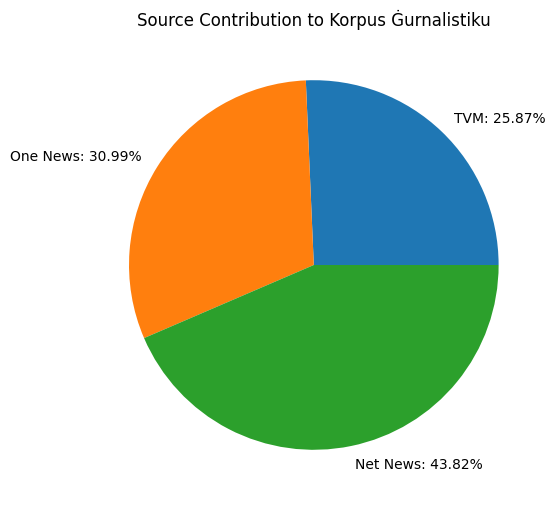

In [12]:
stats = {
    "TVM": tvm_txt,
    "One News": one_txt,
    "Net News": net_txt
}

percentage_values = [len(value) / len(combined) * 100 for value in stats.values()]
labels = [f'{key}: {p:.2f}%' for key, p in zip(stats.keys(), percentage_values)]

plt.figure(figsize=(6, 6))
plt.pie(percentage_values, labels=labels)
plt.title('Source Contribution to Korpus Ġurnalistiku')
plt.savefig('Source Contribution to Korpus Ġurnalistiku')